In [2]:
%cd /Users/Brett/Code/bricolage-dev/
from bricolage import lineage, threshold3, graph, analysis
from bricolage.analysis_ext import CausalFlowAnalyzer, Information, MutualInfoAnalyzer
from bricolage.neighbourhood import NetworkNeighbourhood, PopulationNeighbourhood

/Users/brett/Dropbox/Code/bricolage-dev


In [3]:
%matplotlib inline
import pandas as pd
import seaborn as sb
import numpy as np
import bisect
from IPython.display import Image

In [4]:
from experiments.hierarchy1 import the_exp

In [24]:
rep = the_exp.treatments[1].replicates[1]
lin = rep.get_lineage()

In [25]:
n = lin.population.get_best()[0]
anc = lin.get_ancestry(n.identifier)
gens = [n.generation for n in anc]
targ = lin.targets[0]

In [26]:
cf = CausalFlowAnalyzer(lin.world, [1, 0, 1])

In [27]:
df = pd.DataFrame(cf.numpy_info_from_collection(anc).sum(axis=2))
df.tail()

,0,1,2,3,4,5
640,0.112801,0.184163,0,0,0.332447,0
641,0.112801,0.184163,0,0,0.332447,0
642,0.112801,0.184163,0,0,0.332447,0
643,0.112801,0.184163,0,0,0.332447,0
644,0.112801,0.184163,0,0,0.332447,0


In [28]:
df.set_index(np.array(gens), inplace=True)

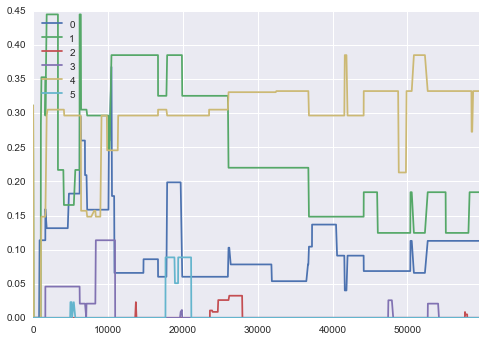

In [29]:
df.plot()

In [30]:
nay = PopulationNeighbourhood(lin.population, 100, .1)

In [31]:
targ.assess_collection(nay.neighbours)

In [32]:
fits = pd.DataFrame(nay.neighbours.fitnesses)

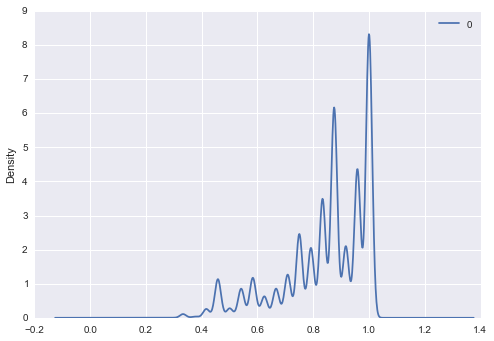

In [33]:
fits.plot(kind='kde')